In [1]:
import numpy as np 
import matplotlib.pyplot as plt

import seaborn as sns

import pandas as pd

In [3]:
df = pd.read_csv(r"C:\Users\dell\Desktop\MyDocs\Docs\MK\youtube_subscribers_data.csv")

In [5]:
df.head()

,Name,Brand channel,Subscribers (millions),Primary language,Category,Country
0,MrBeast,No,335.0,English,Entertainment,United States
1,T-Series,Yes,280.0,Hindi,Music,India
2,Cocomelon - Nursery Rhymes,Yes,186.0,English,Education,United States
3,SET India,Yes,180.0,Hindi,Entertainment,India
4,Vlad and Niki,No,129.0,English,Entertainment,Russia


In [7]:
df.shape

(50, 6)

In [9]:
df.isnull().sum()

Name                      0
Brand channel             0
Subscribers (millions)    0
Primary language          0
Category                  0
Country                   0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [13]:
df.columns

Index(['Name', 'Brand channel', 'Subscribers (millions)', 'Primary language',
       'Category', 'Country'],
      dtype='object')

C:\Users\dell\AppData\Local\Temp\ipykernel_17988\150973779.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Brand channel', data=df, palette='viridis')


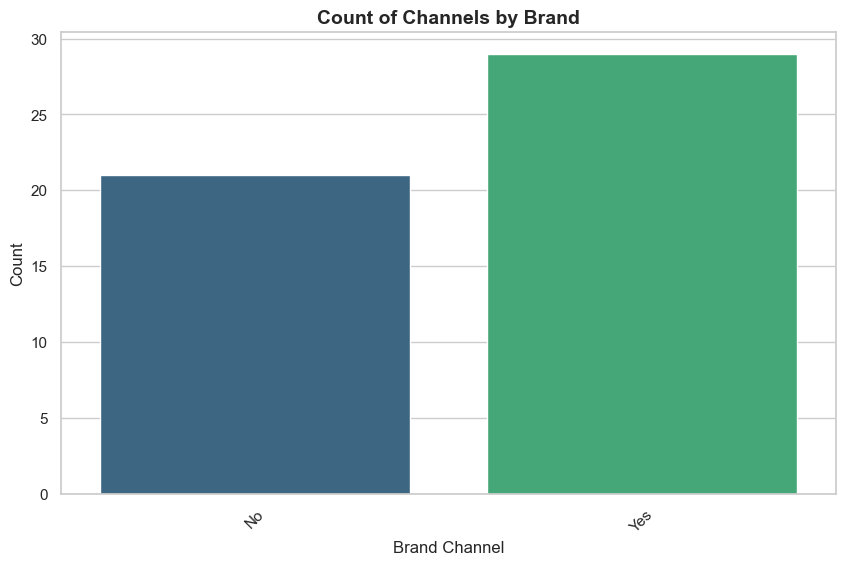

In [15]:
# Set the aesthetic style
sns.set(style="whitegrid")

# 1. Count Plot: Brand channel
plt.figure(figsize=(10, 6))
sns.countplot(x='Brand channel', data=df, palette='viridis')
plt.title('Count of Channels by Brand', fontsize=14, weight='bold')
plt.xticks(rotation=45)
plt.xlabel('Brand Channel')
plt.ylabel('Count')
plt.show()

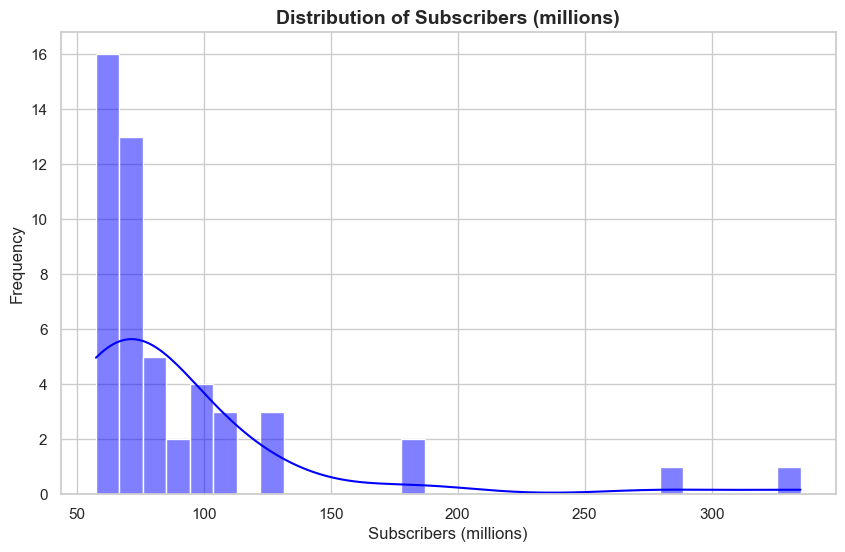

In [17]:
# 2. Histogram: Distribution of Subscribers (millions)
plt.figure(figsize=(10, 6))
sns.histplot(df['Subscribers (millions)'], bins=30, kde=True, color='blue')
plt.title('Distribution of Subscribers (millions)', fontsize=14, weight='bold')
plt.xlabel('Subscribers (millions)')
plt.ylabel('Frequency')
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_17988\1680417500.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Primary language', y='Subscribers (millions)', data=df, palette='Set2')


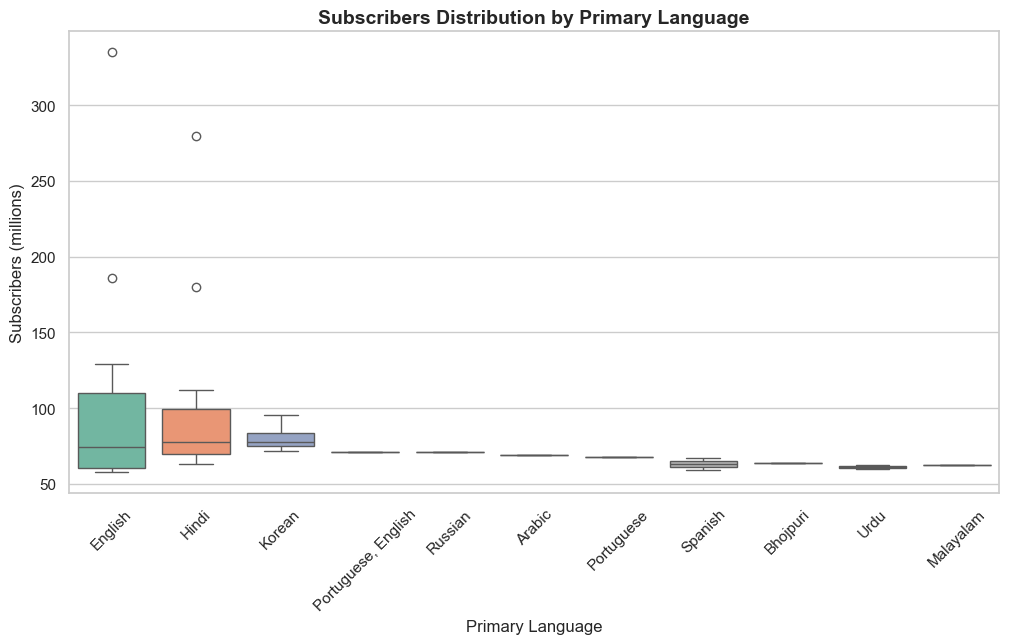

In [19]:
# 3. Boxplot: Subscribers distribution by Primary language
plt.figure(figsize=(12, 6))
sns.boxplot(x='Primary language', y='Subscribers (millions)', data=df, palette='Set2')
plt.title('Subscribers Distribution by Primary Language', fontsize=14, weight='bold')
plt.xticks(rotation=45)
plt.xlabel('Primary Language')
plt.ylabel('Subscribers (millions)')
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_17988\3410656429.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Subscribers (millions)', y='Name', data=top_channels, palette='viridis')


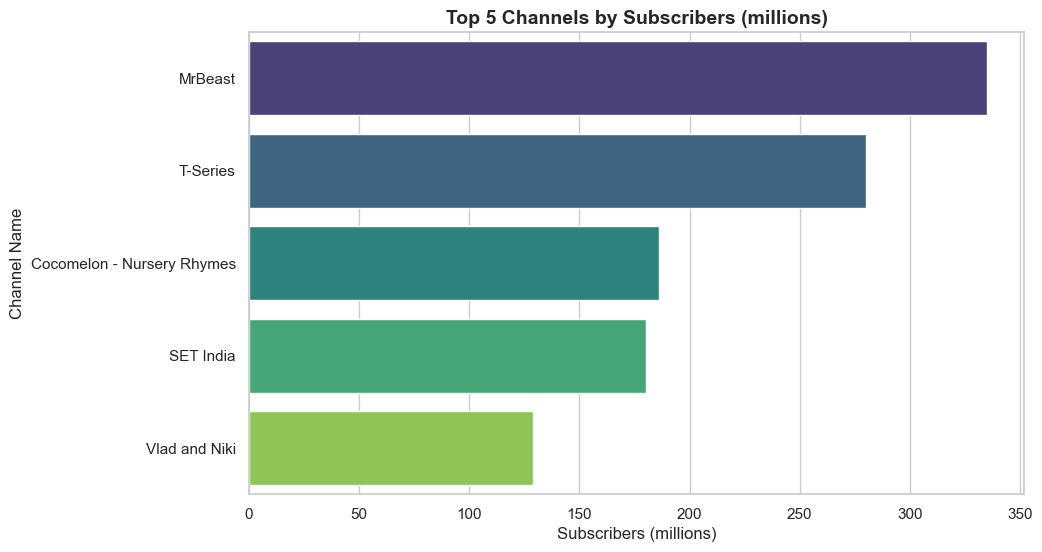

In [21]:
# 4. Bar Plot: Top 5 Channels by Subscribers (millions)
plt.figure(figsize=(10, 6))
top_channels = df.nlargest(5, 'Subscribers (millions)')
sns.barplot(x='Subscribers (millions)', y='Name', data=top_channels, palette='viridis')
plt.title('Top 5 Channels by Subscribers (millions)', fontsize=14, weight='bold')
plt.xlabel('Subscribers (millions)')
plt.ylabel('Channel Name')
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_17988\2634264880.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Category', y='Subscribers (millions)', data=df, palette='coolwarm')


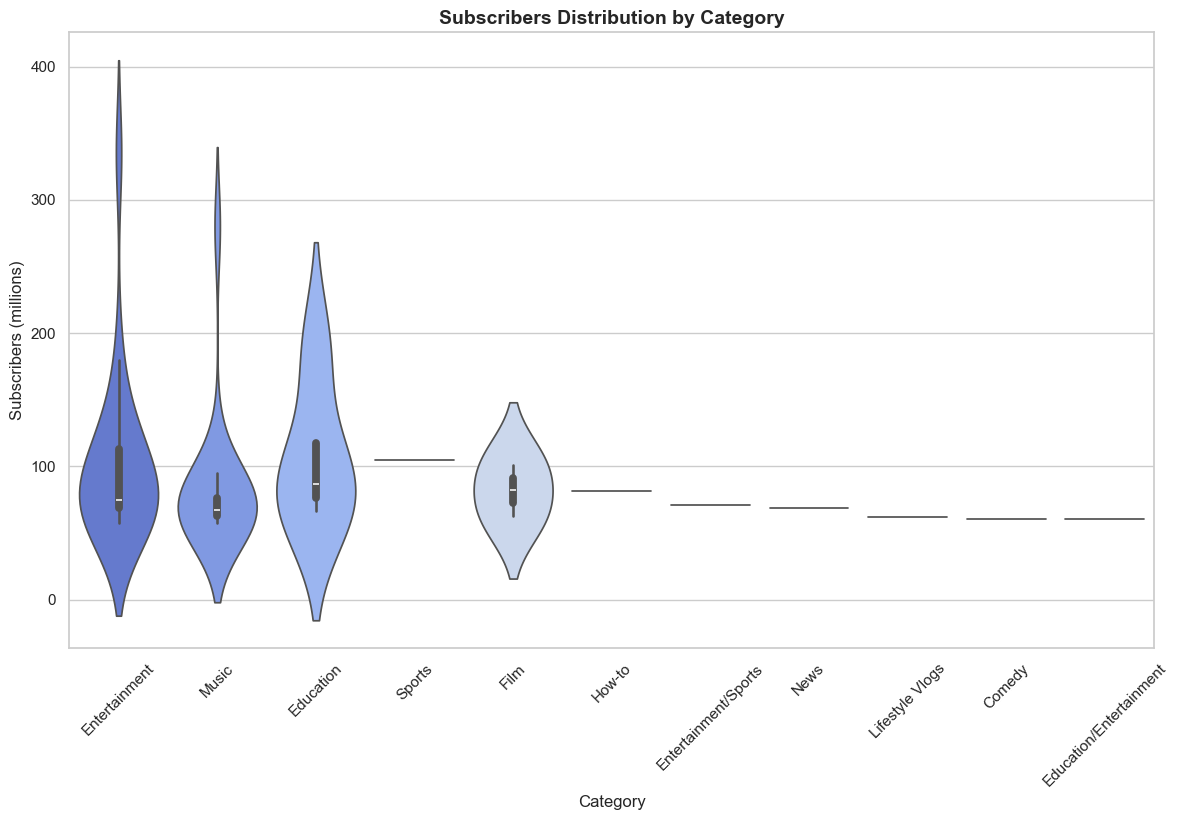

In [23]:
# 5. Violin Plot: Subscribers distribution by Category
plt.figure(figsize=(14, 8))
sns.violinplot(x='Category', y='Subscribers (millions)', data=df, palette='coolwarm')
plt.title('Subscribers Distribution by Category', fontsize=14, weight='bold')
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Subscribers (millions)')
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_17988\2581494500.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Subscribers (millions)'], shade=True, color='purple')


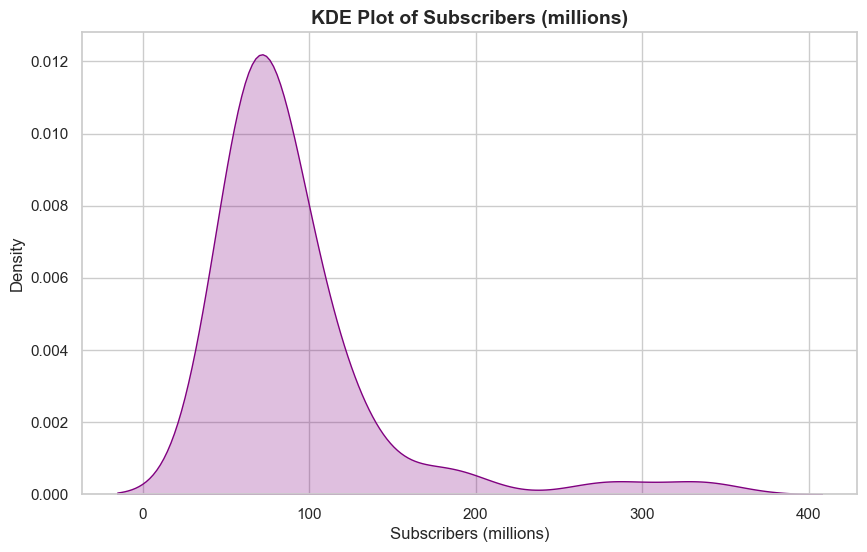

In [25]:
# 6. KDE Plot: Distribution of Subscribers (millions)
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Subscribers (millions)'], shade=True, color='purple')
plt.title('KDE Plot of Subscribers (millions)', fontsize=14, weight='bold')
plt.xlabel('Subscribers (millions)')
plt.ylabel('Density')
plt.show()

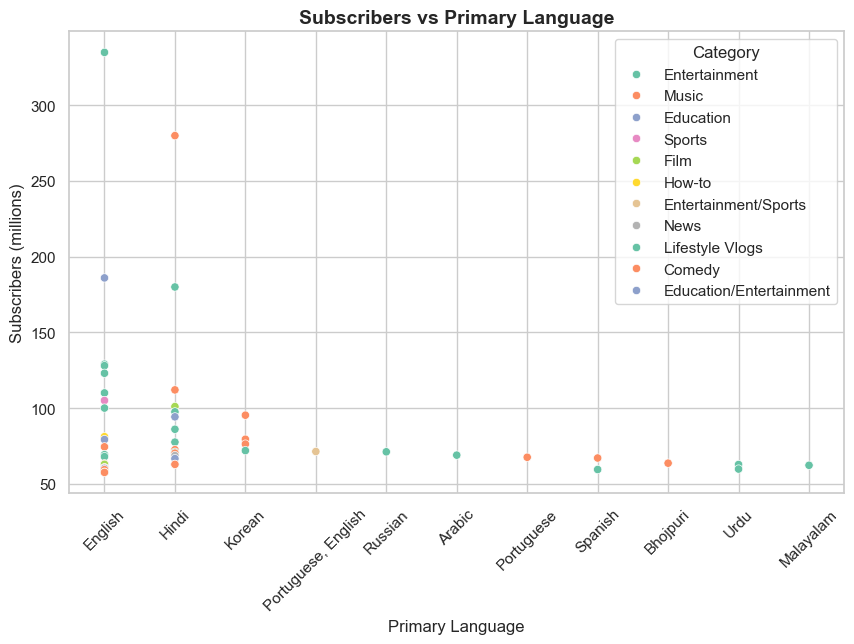

In [27]:
# 8. Scatter Plot: Subscribers vs Primary language
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Primary language', y='Subscribers (millions)', data=df, hue='Category', palette='Set2')
plt.title('Subscribers vs Primary Language', fontsize=14, weight='bold')
plt.xlabel('Primary Language')
plt.ylabel('Subscribers (millions)')
plt.xticks(rotation=45)
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_17988\2755224935.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=col, palette='coolwarm')


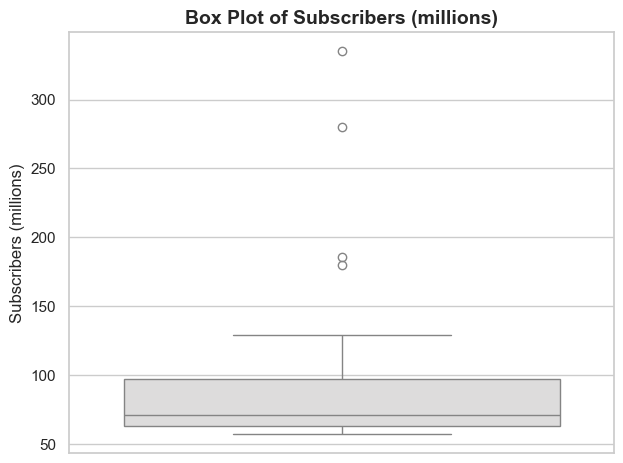

In [29]:
# Plotting box plots for the numerical columns
numeric_columns = ['Subscribers (millions)']

for col in numeric_columns:
    plt.subplot(1, len(numeric_columns), 1)
    sns.boxplot(data=df, y=col, palette='coolwarm')
    plt.title(f'Box Plot of {col}', fontsize=14, weight='bold')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

In [31]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [33]:
encoder = LabelEncoder()

label_mappings = {}

for col in df.select_dtypes('object'):
    df[col] = encoder.fit_transform(df[col])
    label_mappings[col] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

for col, mapping in label_mappings.items():
    print(f"Column: {col}")
    for label, code in mapping.items():
        print(f"{code} -> {label}")
    print()

Column: Name
0 -> 5-Minute Crafts
1 -> A4
2 -> ARY Digital HD
3 -> Aaj Tak
4 -> Alan Chikin Chow
5 -> BANGTANTV
6 -> BillionSurpriseToys
7 -> Blackpink
8 -> Canal KondZilla
9 -> ChuChu TV Nursery Rhymes & Kids Songs
10 -> Cocomelon - Nursery Rhymes
11 -> Colors TV
12 -> Dude Perfect
13 -> El Reino Infantil
14 -> Eminem Music
15 -> Fede Vigevani
16 -> Goldmines
17 -> HAR PAL GEO
18 -> Hybe Labels
19 -> Infobells - Hindi
20 -> Justin Bieber
21 -> KL BRO Biju Rithvik
22 -> Kids Diana Show
23 -> Like Nastya
24 -> LooLoo Kids
25 -> Mark Rober
26 -> Marshmello
27 -> Movieclips
28 -> MrBeast
29 -> PewDiePie
30 -> Pinkfong
31 -> SET India
32 -> Shemaroo Filmi Gaane
33 -> Sony Music India
34 -> Sony SAB
35 -> Stokes Twins
36 -> T-Series
37 -> T-Series Bhakti Sagar
38 -> Taylor Swift
39 -> Tips Official
40 -> Toys and Colors
41 -> UR · Cristiano
42 -> Vlad and Niki
43 -> WWE
44 -> Wave Music
45 -> YRF
46 -> ZAMZAM ELECTRONICS TRADING
47 -> Zee Music
48 -> Zee TV
49 -> 김프로KIMPRO

Column: Brand ch

In [35]:
df.shape

(50, 6)

In [37]:
df.head()

,Name,Brand channel,Subscribers (millions),Primary language,Category,Country
0,28,0,335.0,2,3,14
1,36,1,280.0,3,8,5
2,10,1,186.0,2,1,14
3,31,1,180.0,3,3,5
4,42,0,129.0,2,3,10


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [41]:
# Split the data into features and target variable
X = df.drop('Subscribers (millions)', axis=1)  # Features
y = df['Subscribers (millions)']  # Target variable

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [45]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [47]:
# Define regression models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor()
}

In [49]:
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2': r2}

In [51]:
# Print results
for name, metrics in results.items():
    print(f"Model: {name}")
    print(f"Mean Squared Error (MSE): {metrics['MSE']}")
    print(f"R-squared (R2): {metrics['R2']}\n")

Model: Linear Regression
Mean Squared Error (MSE): 702.3831908690106
R-squared (R2): -5.4095356066163856

Model: Ridge Regression
Mean Squared Error (MSE): 687.6503986354676
R-squared (R2): -5.275092815795974

Model: Lasso Regression
Mean Squared Error (MSE): 642.4879895806575
R-squared (R2): -4.862967251459451

Model: Random Forest Regressor
Mean Squared Error (MSE): 1072.4135958000024
R-squared (R2): -8.786215297657256

Model: Gradient Boosting Regressor
Mean Squared Error (MSE): 971.2249596740066
R-squared (R2): -7.862827359753894

